<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/economicgrowth_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-66e4ddf2b273>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt_filtered['growth_rate_per_person'] = pwt_filtered.groupby('country')['rgdpe'].pct_change() * 100


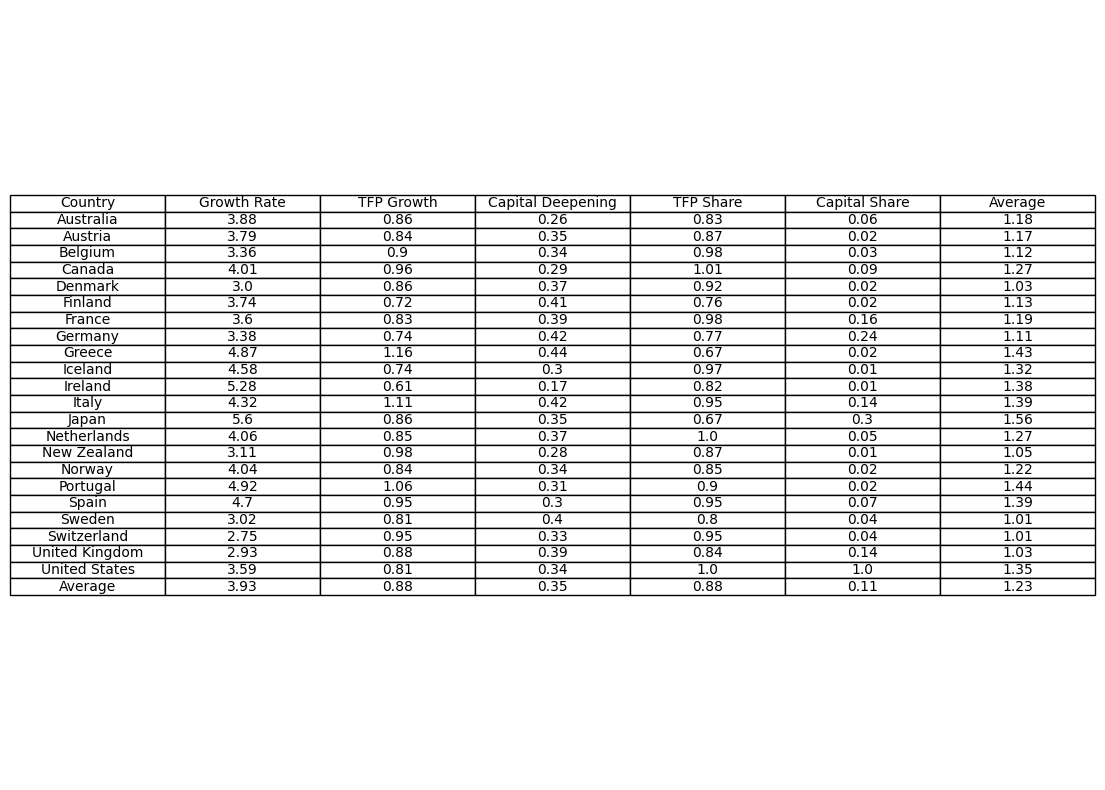

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of countries to include
countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']

# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')

# Filter the dataset for the years 1960-2000 and the specified countries
pwt_filtered = pwt1001[(pwt1001['year'] >= 1960) & (pwt1001['year'] <= 2000) & (pwt1001['country'].isin(countries))]

# Calculate the growth rate per person
pwt_filtered['growth_rate_per_person'] = pwt_filtered.groupby('country')['rgdpe'].pct_change() * 100

# Group by country and calculate averages for the relevant columns, including the new growth rate per person
pwt_grouped = pwt_filtered.groupby('country').agg({
    'growth_rate_per_person': 'mean',  # Growth rate per person
    'rtfpna': 'mean',  # Total Factor Productivity (TFP)
    'rkna': 'mean',  # Capital stock
    'ctfp': 'mean',  # TFP share
    'ck': 'mean'  # Capital share
}).reset_index()

# Rename columns to match the provided table
pwt_grouped.columns = ['Country', 'Growth Rate', 'TFP Growth', 'Capital Deepening', 'TFP Share', 'Capital Share']

# Calculate the row-wise average
pwt_grouped['Average'] = pwt_grouped[['Growth Rate', 'TFP Growth', 'Capital Deepening', 'TFP Share', 'Capital Share']].mean(axis=1)

# Calculate the average of each column
average_row = pwt_grouped.mean(numeric_only=True)
average_row['Country'] = 'Average'
average_row = pd.DataFrame(average_row).transpose()

# Append the average row to the grouped DataFrame
pwt_grouped = pd.concat([pwt_grouped, average_row], ignore_index=True)

# Round up the values to two decimal places using numpy's ceil function
pwt_grouped = pwt_grouped.applymap(lambda x: np.ceil(x*100)/100 if isinstance(x, (int, float)) else x)

# Plot the table
fig, ax = plt.subplots(figsize=(14, 10))  # set size frame
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=pwt_grouped.values, colLabels=pwt_grouped.columns, cellLoc='center', loc='center')

plt.show()
